In [ ]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

## **Part A:**

**Question 1:**

***1.***

In [ ]:
sensitivity = 0.99  # TPR
specifity = 0.96  # TNR

priors = np.array([290000 / (6.8 * 10 ** 9), 1 - 290000 / (6.8 * 10 ** 9)])

def posteriors(priors, sensitivity):
  likelihood = np.array([sensitivity, 1 - sensitivity])
  evidence = np.sum(likelihood * priors)
  return priors * likelihood / evidence

The function takes the prior probabilities array as well as sensitivity. If we want to compute the probability of a person not having the desease given that they tested negative we use the specifity instead of the sensitivity

***2.***

In [ ]:
posterior = posteriors(priors, sensitivity)
print(posterior)

[0.00420449 0.99579551]


We print the posterior usign the above ***posterior function*** and that probability is **0.00420449**

***3.***

In [ ]:
priors_2 = posterior
posterior_2 = posteriors(priors_2, sensitivity)
print(posterior_2)

[0.2947822 0.7052178]


For 2 tests in a row we use the first posterior probability as the prior, which also changes our evidence, so by calling the posterior function we find the new posterior, which as expected is higher, **0.2947822**

***4.***

In [ ]:
#We set the new priors according to the exercise
new_priors = np.array([
                       [1/ (2 * 10 ** 6), 1 - 1 / (2 * 10 ** 6)],
                       [1 / (7.5 * 10 ** 6), 1 - 1 / (7.5 * 10 ** 6)],
                       [1 / 10**9, 1 - 1 / 10 ** 9]
                       ])
likelihood = np.array([sensitivity, 1 - sensitivity])

#The evidence changes as well
new_evidence = np.array([
                        [np.sum(new_priors[0] * likelihood)],
                        [np.sum(new_priors[1] * likelihood)],
                        [np.sum(new_priors[2] * likelihood)]
                        ])

def posteriors_new(priors, likelihood, evidence):
  return (priors * likelihood) / evidence

#We print the new posterior probabilities
for i in range(3):
  print(posteriors_new(new_priors[i], likelihood, new_evidence[i]))

[4.94975746e-05 9.99950502e-01]
[1.31998275e-05 9.99986800e-01]
[9.89999903e-08 9.99999901e-01]


For the new priors we need to change the evidence so we impliment a slightly different function that returns the new posteriors

***5.*** If there is a very low chance of finding the disease in the population, then the probability of a person having the disease decreaces, even given that there has been a posistive test. In *Question A4.* we see the difference it makes when the disease is more frequently found in the population.

## **Part B:**

**Question 1:**

***1.***

In [ ]:
_diff_birth = 365 * 364 / (365 ** 2)
print(_diff_birth)

0.9972602739726028


The probabilities of each individual birthday are independent so for the first child we have **365/365** days an for the second **364/365**

***2.***

In [ ]:
def combs(n, k):
  return m.factorial(n) / (m.factorial(n - k) * m.factorial(k))
print(combs(23, 2))

253.0


This is just a function that computes the binomial coefficient, which is the combinations in which we can select **2** children out of **23**

***3.***

In [ ]:
def diff_birth(child_num):
  return (combs(365, child_num) * m.factorial(child_num)) / 365 ** child_num
print(diff_birth(23))

0.4927027656760146


The ***diff_birth*** function computes the probability that m children have different birthdays. We print the ***diff_birth(23)*** and that probability is **0.4927027656760146**

***4.***

In [ ]:
print(1 - diff_birth(70))

0.9991595759651571


The probability in question is *1 - (the probability of all children having different birthdays)*. By trials we find that with **70** children we have a **0.999(...)** probability of having at least **2** with the same birthday

**Question 2:**

***1.***

In [ ]:
#(a)Prob of one left
#p(x|L) = x / 365

#(b)Prob of 5 lefts in a row
#p(x|5L) = x / 365 ** 5

#(c)Prob of 4 lefts and 6 rigths times the binomial coefficient for the possible combinations
#p(x|4L,6R) = combs(10,4) * (x / 365 ** 4) * ((365 - x) / 365 ** 6)

#(d)
def guess_likelihood(x, guess):
  if guess == 'L':
    return x / 365
  elif guess == 'R':
    return (365 - x) / 365

The ***guess_likelihood*** takes the x (which is a day between 1-365) and a guess and gives the likelihood of the guess

***2.***

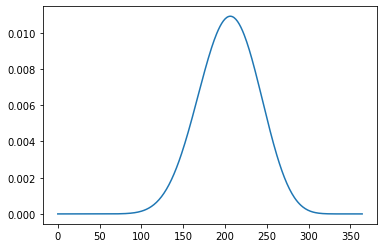

In [ ]:
def update(guess, priors, likelihood_function):
  likelihood = np.array([likelihood_function(x, guess) for x in range(365)])
  evidence = np.sum(priors * likelihood)
  return (priors * likelihood) / evidence

#We set the priors as an array with 365 slots all with equal probability
priors = np.ones(365) / 365

#The guesses we have
guesses = "LLLRLRRLRRRLLLRLLRRRLLL"

posteriors = np.zeros([len(guesses) + 1, len(priors)])
posteriors[0] = priors

for i,j in enumerate(guesses):
  posteriors[i+1] = update(j, posteriors[i], guess_likelihood)

plt.plot(posteriors[23])
plt.show()

For the plot we compute the posteriors array, and to plot the distribution we use the 365 probabilities which are the last update (the 23rd) given our guesses

***3.***

In [ ]:
max_index = np.argmax(posteriors[23])

print(max_index)

206


We find the most probable date by going through the last update of posteriors and finding the day with the biggest probability

***4.***

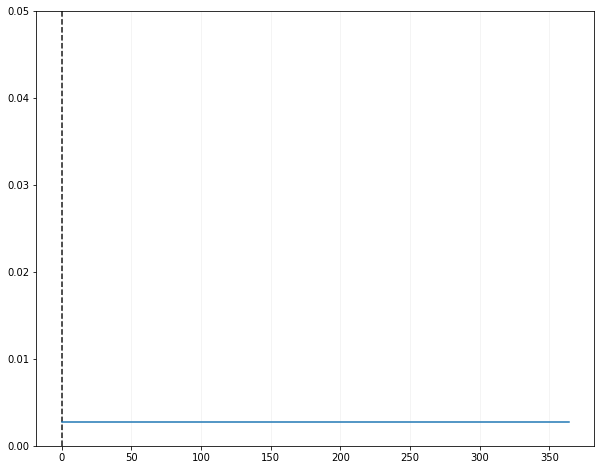

In [ ]:
#Plot
def prepare_animation(ax, posteriors):
  def animate(frame_number):
    ax.clear()
    ax.set_ylim((0, 0.05))
    ax.grid(axis='x', color='0.95')
    ax.axvline(x=np.argmax(posteriors[frame_number]), color = 'k', linestyle = '--', alpha=0.9)
    plot = ax.plot(posteriors[frame_number])

    return plot
  return animate

fig, ax = plt.subplots(figsize=(10, 8))
anim = animation.FuncAnimation(fig, prepare_animation(ax, posteriors), len(posteriors), repeat=True, blit=False)
anim

We use the posteriors in the posterior array for each step of the animation